# STINTSY GROUP 8 MACHINE PROJECT
## PIANO, TAHIMIC, TAMAYO, TIPAN

## I. INTRODUCTION

The dataset that will be used in this project will be the house prices dataset. The data set contains multiple features of different houses including the price of the house, the number of bedrooms and bathrooms, and a lot more. The problem that this project aims to solve is the predicting or the identification of the price of the house given the features the house has, thus this paper will heavily use regression as the main method to obtain the predicted values

## II. Description of the Dataset

This dataset contains house sale prices for King County during the period of May 2014 to May 2015.

### Tabularized List of Variables

| [house_prices.csv] **Variable Name** | **Description**|
|--------------------------------------|----------------|
|**id** | A notation for the house|
|**date** | Date the house is sold|
|**price** | The Sale price of the house|
|**bedrooms** | The Number of bedrooms |
|**bathrooms** | The Number of bathrooms |
|**sqft_livin** | Size of the living area in square feet |
|**sqft_lo**t | Size of the lot in square feet |
|**floors** | Total floors in the house |
|**waterfront** | '1' if the property has waterfront, '0' if none |
|**view** | An index of 0 to 4 of good the view of the property was |
|**condition** | Condition of the house, ranked from 1 to 5 |
|**grade** | Classification by construction quality which refers to the types of materials used and the quality of workmanship. Buildings of better quality (higher grade) cost more to build per unit of measure and command higher value. |
|**sqft_above** | Square feet above ground |
|**sqft_basement** | Square feet below ground |
|**yr_built** | Year the house was built |
|**yr_renovated** | Year the house was renovated, 0 if never renovated |
|**zipcode** | 5 Digit zip code |
|**lat** | Latitude Coordinate |
|**long** | Longitude Cooridinate |
|**sqft_living15** | Average size of interior housing living space for the closest 15 houses, in square feet |
|**sqft_lot15** | Average size of land lots for the closest 15 houses, in square feet |

## III. Libraries Required

## IV. DATA PREPROCESSING AND CLEANING

Perform the necessary steps before using the data. In this section of the notebook, please take
note of the following:
• If needed, perform preprocessing techniques to transform the data to the appropriate
representation. `This may include binning, log transformations, conversion to one-hot
encoding, normalization, standardization, interpolation, truncation, and feature
engineering, among others. ` There should be a correct and proper justification of the use
of each preprocessing technique used in the project.

• Make sure that the data is clean, especially features that are used in the project. This
may include checking for misrepresentations, checking the data type, dealing with
missing data, dealing with duplicate data, and dealing with outliers, among others. There
should be a correct and proper justification of the application (or non-application) of each
data cleaning method used in the project. Clean only the variables utilized in the study

In [1]:
import pandas as pd
house = pd.read_csv('house_prices.csv')
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In order to improve the performance of our machine learning models, it is important to remove features that may cause noise, or features that doesn't see to be relevant to the goal, such as the id and the date as this information doest have a relation with the price of the house. Additonally, locational data such data such as zipcode, lat, and long is hard to relate to the price of the house, as lat and long are all almost the same, while the zipcode, just identifies what part of King County the house is in, and doesn't really describe the features of the house the much. 

In [2]:
house = house.drop('id' , axis = 1)
house = house.drop('date' , axis = 1)
house = house.drop('zipcode', axis=1)
house = house.drop('lat', axis=1)
house = house.drop('long', axis=1)

Columns such as sqft_living15, and sqft_lot15 talks about the neighbor's houses, specifically the living space, and the lot sizes of the nearby 15 houses, given that it is not about the current house, and that it doesn't give much information other than the surroundings, the dropping of this column may prove helpful in predicting the price of the house based on its own features, instead of its surrounding houses.

In [3]:
house = house.drop('sqft_living15', axis=1)
house = house.drop('sqft_lot15', axis=1)

In [4]:
X = house.iloc[:, 1:]
y = house ['price']

Batch Normalization is an important preprocessing technique that can improve the performance of the ML model. As such it is very important to perform this preprocessing technique on this dataset due to the nature of the values for each feature. For example the values that represents the sqft sizes of the houses are in the thousands, while the values for the other features like the number of bedrooms are just in either the tens or ones place.

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
scaled_X = scaler.transform(X)
print(scaled_X)

[[-0.39873715 -1.44746357 -0.97983502 ... -0.65868104 -0.54489777
  -0.21012839]
 [-0.39873715  0.1756067   0.53363434 ...  0.2451414  -0.6810785
   4.7466776 ]
 [-1.47395936 -1.44746357 -1.42625404 ... -0.65868104 -1.29389179
  -0.21012839]
 ...
 [-1.47395936 -1.77207762 -1.15404732 ... -0.65868104  1.29354209
  -0.21012839]
 [-0.39873715  0.50022075 -0.52252773 ... -0.65868104  1.12331618
  -0.21012839]
 [-1.47395936 -1.77207762 -1.15404732 ... -0.65868104  1.25949691
  -0.21012839]]


# Di ako sure kung tama to ^^ HAHAHAHA, baka issue na values such as waterfront are boolean kasi

## V. EXPLORATORY DATA ANALYSIS

Load the House Prices Dataset

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [7]:
house.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0


### What is the Mean Price of the Houses?

In [8]:
mean_price = y.mean()
print (mean_price)

540088.1417665294


### Find What Feature Affects the Price of the House the Most through correlation

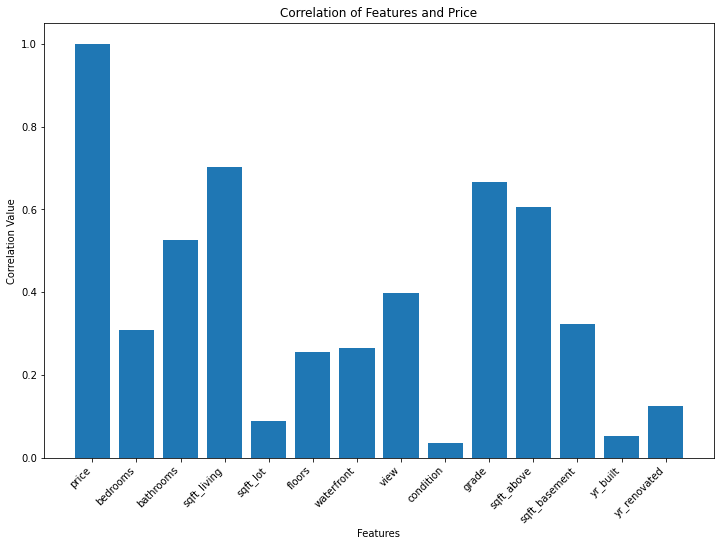

In [9]:
correlation_matrix = house.corr()
corr_price = correlation_matrix['price']

plt.figure(figsize=(12, 8)) 
plt.bar(corr_price.index, corr_price.values)
plt.xlabel('Features')
plt.ylabel('Correlation Value')
plt.title('Correlation of Features and Price')
plt.xticks(rotation=45, ha='right')
plt.show()

According to the correlation chart, the size of the living space is what affects the price of the house the most, after the living space, the grade or the build quality is what affects the price the most.

### What is the relationship of Living Space and the Price of the house

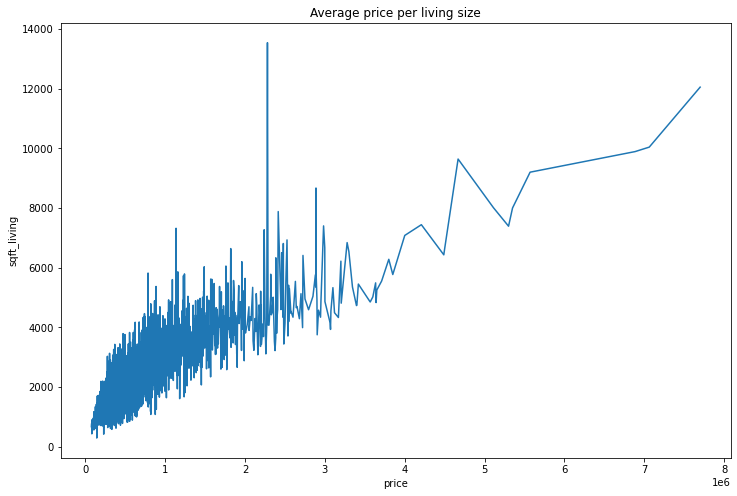

In [10]:
Price_per_livingspace = house.groupby('price')['sqft_living'].mean()

plt.figure(figsize=(12, 8)) 
plt.plot(Price_per_livingspace.index, Price_per_livingspace.values)
plt.xlabel('price')
plt.ylabel('sqft_living')
plt.title('Average price per living size')
plt.show()

As seen in the graph above, it can be seen that there is an upward trend in the price of the Houses. Despite it being unstable around the lower parts, it can be seen that the minimum and maximum prices increases as the living size of the houses increase as well.

### Do Homes that has a lot of Living Space usually have good Build Quality?

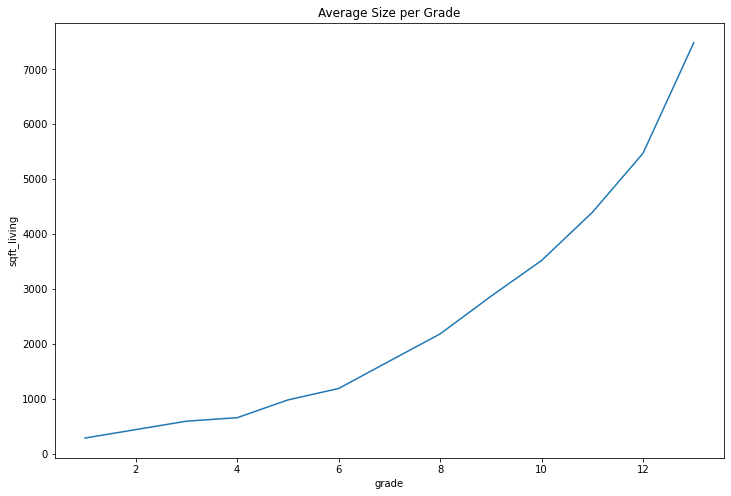

In [11]:
mean_size_per_Grade = house.groupby('grade')['sqft_living'].mean()

plt.figure(figsize=(12, 8)) 
plt.plot(mean_size_per_Grade.index, mean_size_per_Grade.values)
plt.xlabel('grade')
plt.ylabel('sqft_living')
plt.title('Average Size per Grade')
plt.show()

According to the graph, the relationship between the grade and the living space is directly proportional

### 

## VI. MODEL TRAINING (tama pa ba tong pinaggawa ko HAHAHAHA )

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (scaled_X, y, random_state = 0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(16209, 13)
(16209,)
(5404, 13)
(5404,)


## Ordinary Least Squares Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit (X_train, y_train)

LinearRegression()

In [14]:
y_pred = model.predict (X_train)

In [15]:
def compute_RMSE(y_true, y_pred):
    rmse = (y_pred - y_true) ** 2
    rmse = np.mean(rmse)
    rmse = np.sqrt(rmse)
    return rmse

In [16]:
print (compute_RMSE(y_train, y_pred))

216277.24584832205


In [17]:
y_pred = model.predict (X_test)
print (compute_RMSE(y_test, y_pred))

217352.36775650978


## Regression with Stochastic Gradient Descent 

Stochastic Gradient Descent will be done to train the dataset, and will be using default parameters.
* loss = "squared_error"
* penalty - l2 (ridge)
* alpha = 0.0001
* max_iter = 1000
* learning_rate = invscaling
* eta0 or initial learning rate = 0.01

In [18]:
from sklearn.linear_model import SGDRegressor
model = SGDRegressor()
model.fit(X_train, y_train)

SGDRegressor()

In [19]:
y_pred = model.predict (X_train)

In [20]:
print (compute_RMSE(y_train, y_pred))

218953.82740528326


In [21]:
y_pred = model.predict (X_test)
print (compute_RMSE(y_test, y_pred))

219550.2571792117


## Regression with Support Vector Machines

In [44]:
from sklearn.svm import SVR
model = SVR()
print (model.get_params())
model.fit (X_train, y_train)
y_pred = model.predict (X_train)
print (compute_RMSE(y_train, y_pred))

{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
378105.25417492824


In [23]:
y_pred = model.predict (X_test)
print (compute_RMSE(y_test, y_pred))

373168.7475293747


## VII. HYPERPARAMETER TUNING

In Order to find the best model to use in predicting the house prices given the features of the house, hyperparameter tuning must be accomplished.

### Hyperparameter Tuning by RandomizedSearchCV

#### Ordinary Least Squares Linear Regression

In [24]:
from sklearn.model_selection import RandomizedSearchCV
model = LinearRegression()
print (model.get_params())
model.get_params().keys()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}


dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize', 'positive'])

In [25]:
hyperparameters = [
    {
        "copy_X" : [ True, False ],
        "fit_intercept" : [True, False],
        "positive" : [True, False]
    }
]

In [26]:
rsc_house = RandomizedSearchCV (estimator = model , param_distributions = hyperparameters , n_iter = 8, cv = 5, random_state = 42)

In [27]:
rsc_house.fit (X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LinearRegression(), n_iter=8,
                   param_distributions=[{'copy_X': [True, False],
                                         'fit_intercept': [True, False],
                                         'positive': [True, False]}],
                   random_state=42)

In [28]:
best_params = rsc_house.best_params_
print(best_params)

{'positive': False, 'fit_intercept': True, 'copy_X': True}


In [29]:
best_estimator = rsc_house.best_estimator_
y_pred = best_estimator.predict (X_test)
print (compute_RMSE(y_test, y_pred))

217352.36775650978


#### Regression with Stochastic Gradient Descent

In [30]:
model = SGDRegressor()
print (model.get_params())
model.get_params().keys()

{'alpha': 0.0001, 'average': False, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.01, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'invscaling', 'loss': 'squared_error', 'max_iter': 1000, 'n_iter_no_change': 5, 'penalty': 'l2', 'power_t': 0.25, 'random_state': None, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


dict_keys(['alpha', 'average', 'early_stopping', 'epsilon', 'eta0', 'fit_intercept', 'l1_ratio', 'learning_rate', 'loss', 'max_iter', 'n_iter_no_change', 'penalty', 'power_t', 'random_state', 'shuffle', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [31]:
hyperparameters = [
    {
        "alpha" : [0.0001 , 0.001, 0.01, 0.1 , 1.0],
        'l1_ratio': [0.0, 0.1, 0.5, 0.9, 1.0],
        'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
        'eta0': [0.01, 0.1, 0.5]
    }
]

In [32]:
rsc_house = RandomizedSearchCV (estimator = model , param_distributions = hyperparameters , n_iter = 50, cv = 5, random_state = 42)

In [33]:
rsc_house.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=SGDRegressor(), n_iter=50,
                   param_distributions=[{'alpha': [0.0001, 0.001, 0.01, 0.1,
                                                   1.0],
                                         'eta0': [0.01, 0.1, 0.5],
                                         'l1_ratio': [0.0, 0.1, 0.5, 0.9, 1.0],
                                         'learning_rate': ['constant',
                                                           'optimal',
                                                           'invscaling',
                                                           'adaptive']}],
                   random_state=42)

In [34]:
rsc_house.best_params_

{'learning_rate': 'adaptive', 'l1_ratio': 0.9, 'eta0': 0.5, 'alpha': 0.01}

In [35]:
best_estimator = rsc_house.best_estimator_
y_pred = best_estimator.predict (X_test)
print (compute_RMSE(y_test, y_pred))

217430.5832286858


#### Support Vector Regression

In [36]:
model = SVR()
print (model.get_params())
model.get_params().keys()

{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}


dict_keys(['C', 'cache_size', 'coef0', 'degree', 'epsilon', 'gamma', 'kernel', 'max_iter', 'shrinking', 'tol', 'verbose'])

In [37]:
hyperparameters = [
    {
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'C': [0.1, 1, 10],
        'gamma': ["scale", "auto", 0.01, 0.1, 1],
        'epsilon': [0.1, 0.2, 0.5]
    }
]

In [43]:
rsc_house = RandomizedSearchCV (estimator = model , param_distributions = hyperparameters , n_iter = 10, cv = 5, random_state = 42)
rsc_house.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=SVR(),
                   param_distributions=[{'C': [0.1, 1, 10],
                                         'epsilon': [0.1, 0.2, 0.5],
                                         'gamma': ['scale', 'auto', 0.01, 0.1,
                                                   1],
                                         'kernel': ['linear', 'poly', 'rbf',
                                                    'sigmoid']}],
                   random_state=42)

In [41]:
rsc_house.best_params_

{'kernel': 'rbf', 'gamma': 'scale', 'epsilon': 0.5, 'C': 1}

In [42]:
best_estimator = rsc_house.best_estimator_
y_pred = best_estimator.predict (X_test)
print (compute_RMSE(y_test, y_pred))

373168.7475293747
